In [1152]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [1153]:
TRAIN_DATASET_PATH = '../housing_train.csv'

In [1154]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [1155]:
df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,population_per_room,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,distance_to_center_1,distance_to_center_2,rooms_per_house,bedrooms_as_percentage,income_to_house_age_ratio,median_income_to_distance_to_center_1,median_income_to_distance_to_center_2
0,-1.330277,1.036473,1.025853,2.959952,452600.0,-0.522705,-0.881005,-0.704248,2.901549,-0.376027,-1.529109,1.150787,-0.019475,-0.742471,0.042035,-1.239909,-0.496369
1,-1.325291,1.027171,-0.603438,2.944799,358500.0,-0.580070,-0.881005,-0.704248,2.901549,-0.376027,-1.548054,1.143468,-0.049681,-0.652873,0.792660,-1.243955,-0.496101
2,-1.335263,1.022519,1.921963,2.280068,352100.0,-0.580302,-0.881005,-0.704248,2.901549,-0.376027,-1.556264,1.145778,0.033327,-0.908659,-0.205849,-1.227068,-0.394509
3,-1.340249,1.022519,1.921963,1.252220,341300.0,-0.373386,-0.881005,-0.704248,2.901549,-0.376027,-1.555264,1.148171,-0.066720,-0.373910,-0.327058,-1.183938,-0.163835
4,-1.340249,1.022519,1.921963,0.108107,342200.0,-0.561327,-0.881005,-0.704248,2.901549,-0.376027,-1.555264,1.148171,-0.047911,-0.494233,-0.461978,-1.093914,0.319290


In [1156]:
feature_names = df.columns.tolist()
feature_names.remove('median_house_value')

target_name = 'median_house_value'
feature_names

['longitude',
 'latitude',
 'housing_median_age',
 'median_income',
 'population_per_room',
 '<1H OCEAN',
 'INLAND',
 'NEAR BAY',
 'NEAR OCEAN',
 'distance_to_center_1',
 'distance_to_center_2',
 'rooms_per_house',
 'bedrooms_as_percentage',
 'income_to_house_age_ratio',
 'median_income_to_distance_to_center_1',
 'median_income_to_distance_to_center_2']

In [1157]:
X = df[feature_names]
y = df[target_name]

In [1158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

R2:	0.592
MAE:	45725.988
MSE:	3788732070.223


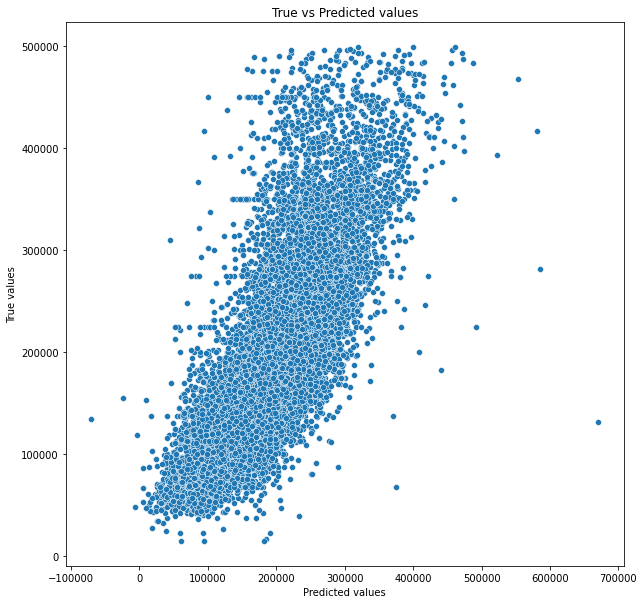

In [1159]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.613
MAE:	45469.192
MSE:	3758410700.832


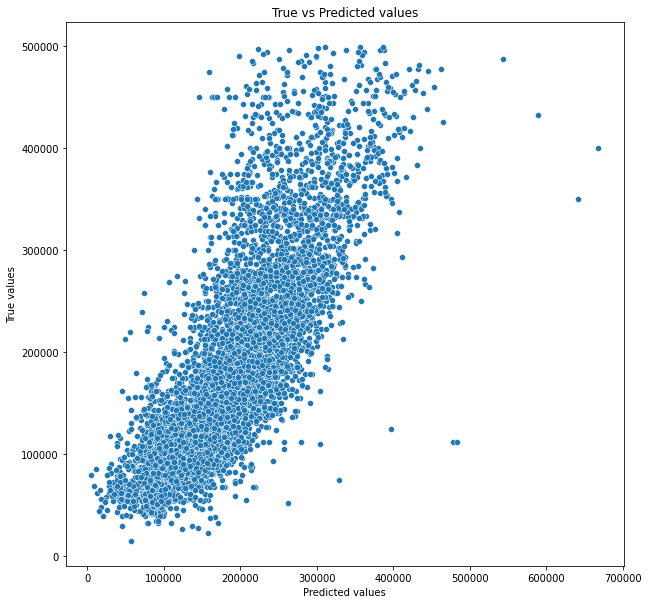

In [1160]:
y_test_preds = lr_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

R2:	0.75
MAE:	34782.319
MSE:	2326395994.215


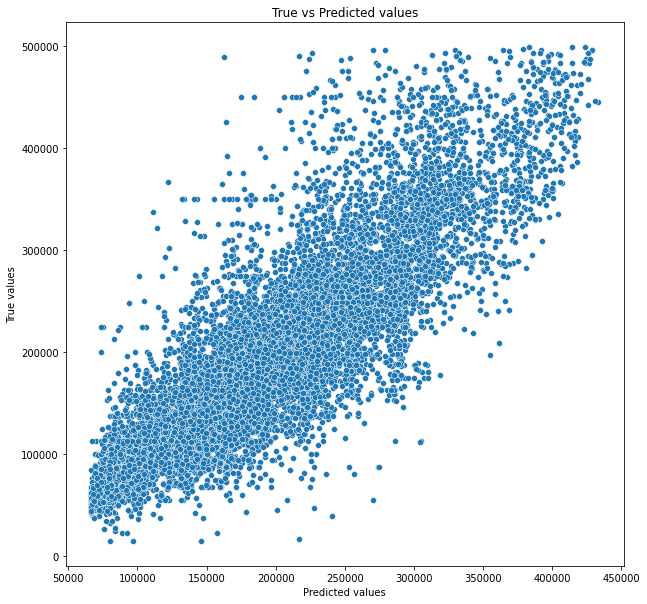

In [1161]:
rf_model = RandomForestRegressor(max_depth=7, n_estimators=400)
rf_model.fit(X_train, y_train)

y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.725
MAE:	36928.402
MSE:	2668412699.107


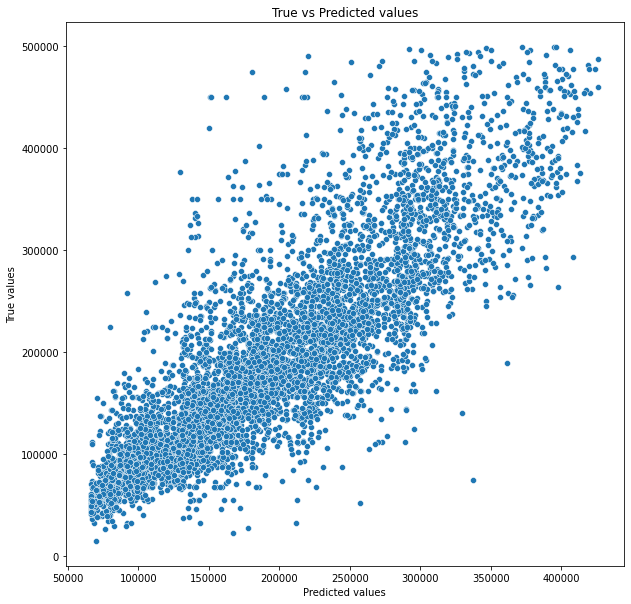

In [1162]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

R2:	0.978
MAE:	10833.635
MSE:	208518398.063


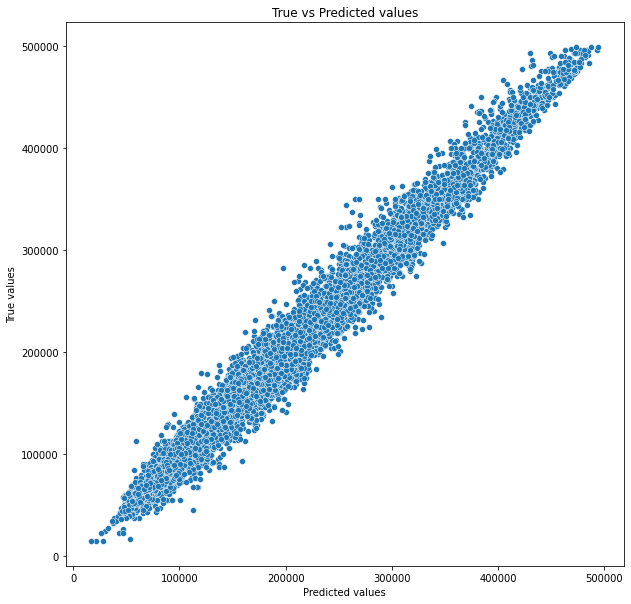

In [1163]:
gb_model = GradientBoostingRegressor(max_depth=7, n_estimators=400, random_state=21)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.835
MAE:	26546.963
MSE:	1601668226.897


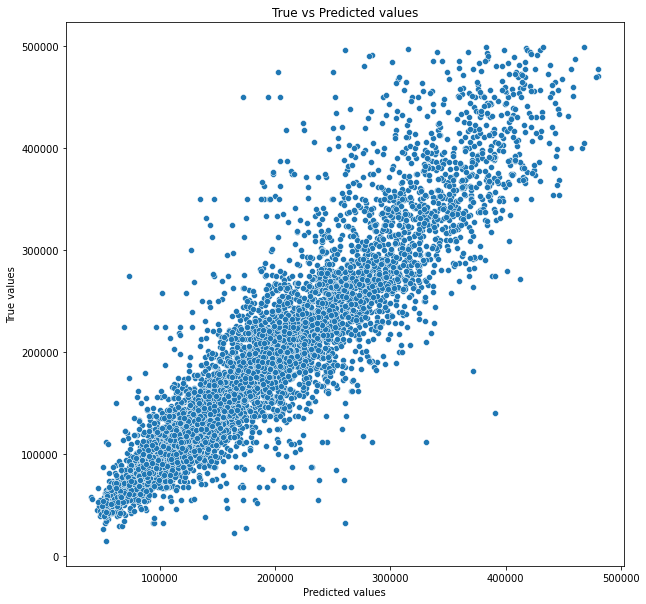

In [1164]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [1165]:
feature_importances = pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
3,median_income,0.404117
6,INLAND,0.157947
4,population_per_room,0.078990
1,latitude,0.067172
0,longitude,0.055955
10,distance_to_center_2,0.055862
9,distance_to_center_1,0.048017
11,rooms_per_house,0.026867
12,bedrooms_as_percentage,0.022097
2,housing_median_age,0.021240


In [1166]:
# GradientBoostingRegressor даёт лучший результат так как R2 ближе к 1, а MAE и MSE меньше.

In [1167]:
# По данным мы видим что делаем более точные предсказания по дешёвым домам, и есть существенно больший разброс по дорогим домам.